<a href="https://colab.research.google.com/github/Swaranapavan2003/CODEXINTERN/blob/main/Housepriceprediction_Task-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# House Price prediction
# Task 2 - CodexIntern Internship
# Author: Swarna Pavan

In [6]:
# Step 1: Import Required Libraries
# These libraries are necessary for data manipulation, visualization, model building, and evaluation.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # Corrected import
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the California housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [7]:
# Step 2: Load and Explore the Dataset
# Convert the loaded dataset to a DataFrame for easier handling.
california_housing_df = pd.DataFrame(X, columns=housing.feature_names)
california_housing_df['MedHouseVal'] = y # Add the target column to the DataFrame


# Display the first few rows of the dataset
print(california_housing_df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


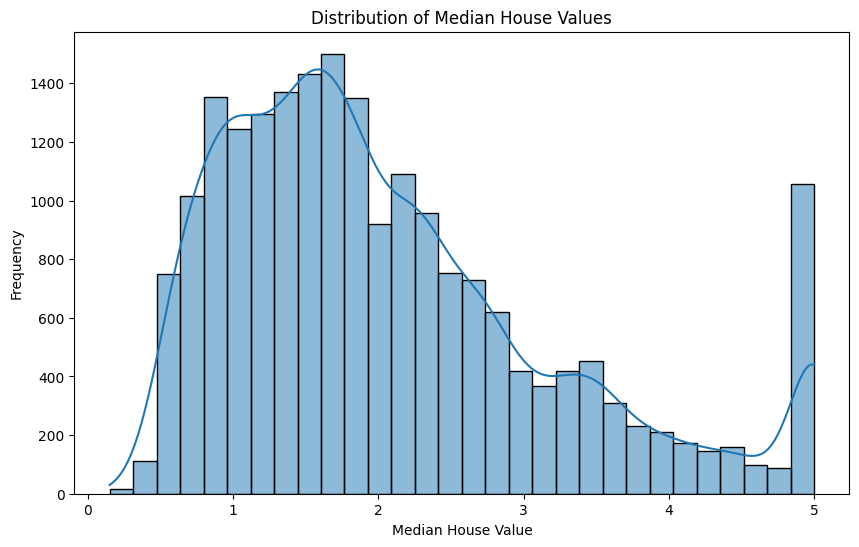

In [8]:
# Step 3: Explore Data Distributions
# Visualize the distribution of house prices and check for correlation between features
plt.figure(figsize=(10, 6))
sns.histplot(california_housing_df['MedHouseVal'], bins=30, kde=True)
plt.title("Distribution of Median House Values")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()

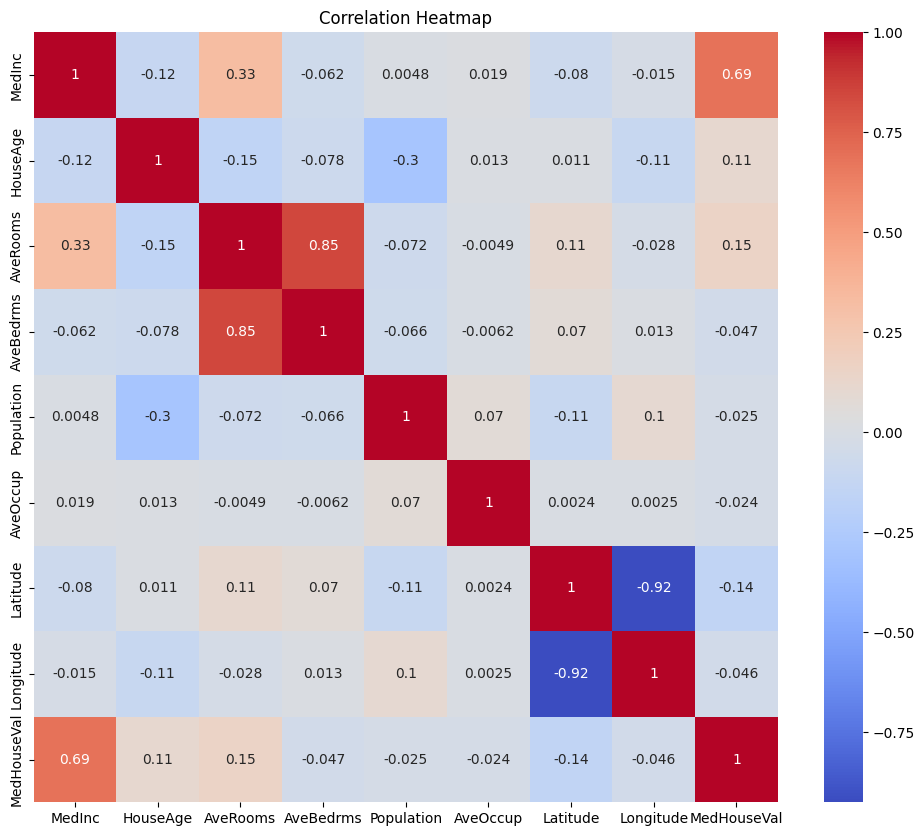

In [9]:
# Display correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(california_housing_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [10]:
# Step 4: Handle Missing Data (if any)
# Check for missing values
print("Missing values in dataset:\n", california_housing_df.isnull().sum())

Missing values in dataset:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [11]:
# Step 5: Preprocess Inputs (Normalization)
# Scale the features using StandardScaler for better model performance
X = california_housing_df.drop("MedHouseVal", axis=1)
y = california_housing_df["MedHouseVal"]

In [12]:


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Step 6: Split Data into Train/Test Sets
# Use 80% for training and 20% for testing to evaluate model performance
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [14]:
# Step 7: Train the Regression Model
# We'll use Linear Regression for this beginner-level task
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Step 8: Make Predictions on Test Data
y_pred = model.predict(X_test)

In [16]:
# Step 9: Evaluate the Model
# Use metrics like Mean Squared Error and R^2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R^2 Score): {r2:.2f}")

Mean Squared Error (MSE): 0.56
R-squared (R^2 Score): 0.58


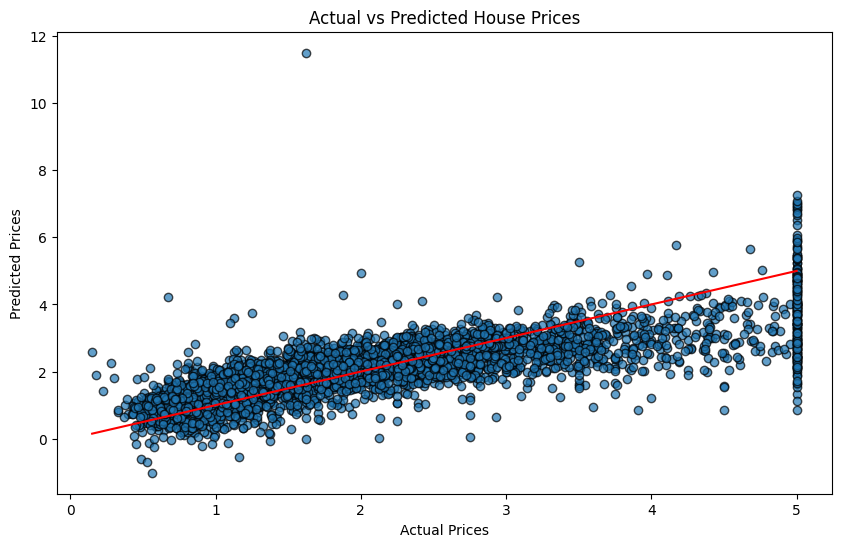

In [17]:
# Step 10: Visualize Predictions vs Actual Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

The scatter plot visualizes the actual median house values against the values predicted by the Linear Regression model.

- Each point represents a house in the test set.
- The x-axis shows the actual median house value.
- The y-axis shows the predicted median house value.
- The red line represents the ideal scenario where predicted values perfectly match actual values (y = x).

Points close to the red line indicate that the model's predictions are close to the actual values. Points further away indicate larger prediction errors. This plot helps assess the model's performance and identify any patterns in the errors. In this plot, we see a general trend of predictions following the actual values, though there is scatter around the line, especially for higher house values.